In [1]:
import cv2
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
import os
from tqdm import tqdm
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
import numpy as np
from scipy import spatial
import seaborn as sns
import os
import copy
import shutil
import threading
import queue
from tqdm import tqdm
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

C:\Users\tsutsui riku\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tsutsui riku\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\tsutsui riku\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
p=[]
path="face-extraction/"
list_dir=os.listdir(path)
for i in list_dir:
    a=i.split(".")[1]
    if a=="jpg" or a=="png" or a=="JPG" or a=="PNG" or a=="jfif":
        p.append(os.path.join(path,i))

In [5]:
size=256
out="resize"
diff=[]
for i in tqdm(p):
    img=cv2.imread(i)
    if img is None:
        continue
    w=img.shape[0]
    h=img.shape[1]
    if w>size and h>size:
        diff.append(abs(w-h))
        

100%|██████████████████████████████████████████████████████████████████████████████| 9884/9884 [03:06<00:00, 53.00it/s]


(array([7.108e+03, 1.857e+03, 5.710e+02, 1.770e+02, 8.500e+01, 3.400e+01,
        9.000e+00, 5.000e+00, 4.000e+00, 1.000e+00]),
 array([  0. ,  79.9, 159.8, 239.7, 319.6, 399.5, 479.4, 559.3, 639.2,
        719.1, 799. ]),
 <a list of 10 Patch objects>)

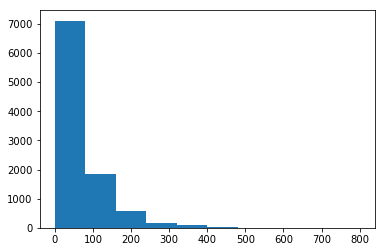

In [7]:
plt.hist(diff)

In [8]:
diff=np.array(diff)

In [10]:
len(diff[diff>200])

515

In [47]:
def resize(img):
    d=img.shape[0]-img.shape[1]
    sh=0
    sw=0
    eh=img.shape[0]
    ew=img.shape[1]
    
    if d>0:
        sh=d//2
        eh=img.shape[0]-d//2
        if eh!=img.shape[1]:
            if eh+1==img.shape[1]:
                eh+=1
            else:
                eh-=1
    else:
        sw=abs(d//2)
        ew=img.shape[1]-abs(d//2)
        if ew!=img.shape[0]:
            if ew+1==img.shape[0]:
                ew+=1
            else:
                ew-=1
    return img[sh:eh,sw:ew]

In [50]:
size=512
out="resize_512"
os.mkdir(out)
for i in tqdm(p):
    img=cv2.imread(i)
    if img is None:
        continue
    w=img.shape[0]
    h=img.shape[1]
    if w>size and h>size:
        img=resize(img)
        dst = cv2.resize(img, dsize=(size,size))
        cv2.imwrite(os.path.join(out,i.split("/")[1]),dst)

100%|██████████████████████████████████████████████████████████████████████████████| 9884/9884 [04:21<00:00, 37.87it/s]
